<div class="alert alert-block alert-info">
<h3><b> Final Project </b></h3>

**Class:** DATA 230 - Sec 22 - Fall 2024

**Team 5:** Cheng-Huan Yu, Chun-Chieh Kuo, Khac Minh Dai Vo, Lam Tran

**Date:** December 4th, 2024

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Regression Model

In [2]:
data=pd.read_csv('smoking.csv')

In [3]:
data.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [4]:
data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


## Calculate the BMI

In [5]:
data['BMI'] = data['weight(kg)'] / (data['height(cm)'] / 100) ** 2

X = data.drop(columns=['ID','BMI', 'weight(kg)', 'height(cm)','ID','gender','tartar','oral',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)'])
y = data['BMI']


## Calculate VIF

In [6]:
numeric_data = X.select_dtypes(include=[np.number])


vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_data.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(len(numeric_data.columns))]


print(vif_data)

                Feature         VIF
0                   age   16.247563
1             waist(cm)  104.746236
2              systolic  195.591452
3            relaxation  153.754826
4   fasting blood sugar   26.863784
5           Cholesterol  104.658420
6          triglyceride    8.025228
7                   HDL   25.663849
8                   LDL   26.169318
9            hemoglobin  110.130749
10        Urine protein    8.280795
11     serum creatinine   20.260707
12                  AST    6.718043
13                  ALT    4.209929
14                  Gtp    2.162058
15        dental caries    1.299305
16              smoking    2.003407


/var/folders/2x/ljq3jznx5tv30732jmhftt2h0000gn/T/ipykernel_48870/1549129958.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="VIF", y="Feature", data=vif_data, palette="coolwarm")


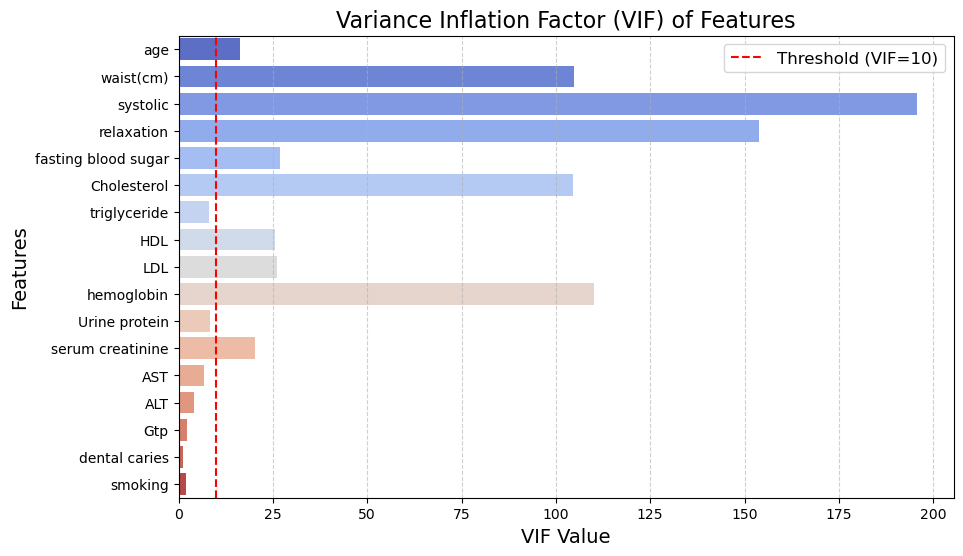

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x="VIF", y="Feature", data=vif_data, palette="coolwarm")
plt.title("Variance Inflation Factor (VIF) of Features", fontsize=16)
plt.xlabel("VIF Value", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.axvline(x=10, color="red", linestyle="--", label="Threshold (VIF=10)")
plt.legend(fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

In [8]:

from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg.fit(X_train, y_train)

y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")

Training MSE: 3.699040547621365
Testing MSE: 3.7151856795006633


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_reg = Ridge(alpha=20,solver='auto')  
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 3.7151808586713284
R-squared Score: 0.6964852091474735


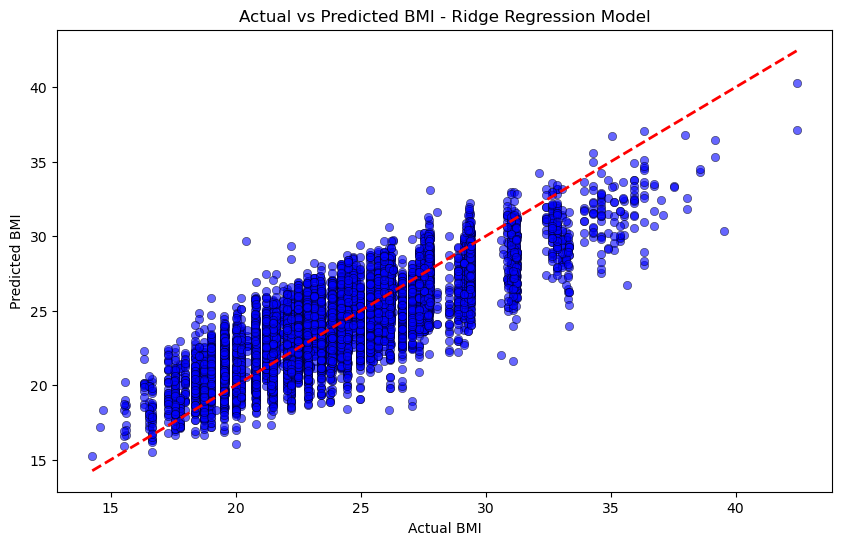

In [10]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Actual BMI")
plt.ylabel("Predicted BMI")
plt.title("Actual vs Predicted BMI - Ridge Regression Model")

plt.show()


In [11]:


# Set up a range of alpha values to observe the effect of regularization
alphas = np.logspace(-3, 3, 100)  # From 0.001 to 1000
coefficients = []
mes_all=[]
# Fit ridge regression models for each alpha and store coefficients
for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha, solver='auto')
    ridge_reg.fit(X_train, y_train)
    coefficients.append(ridge_reg.coef_)

    y_pred = ridge_reg.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mes_all.append(mse)

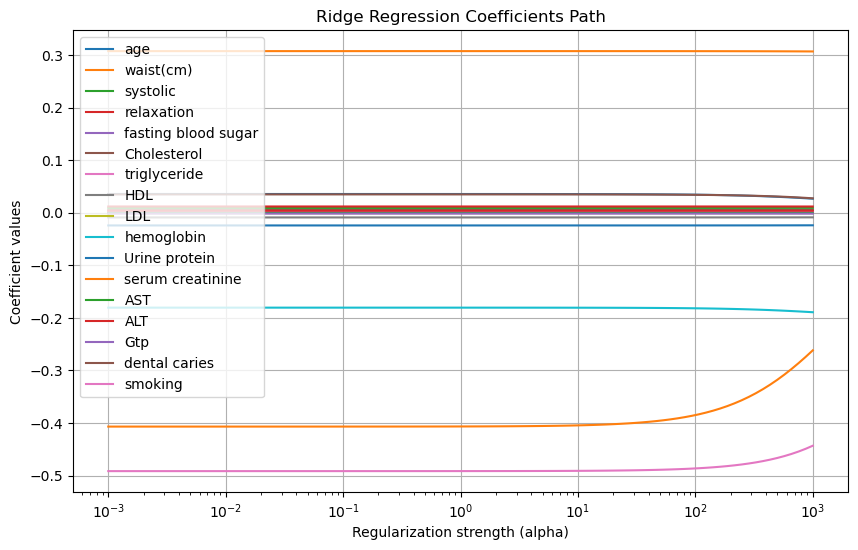

In [12]:
# Convert coefficients to a numpy array for plotting
coefficients = np.array(coefficients)

# Plotting the regularization path
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefficients)
plt.xscale('log')
plt.xlabel('Regularization strength (alpha)')
plt.ylabel('Coefficient values')
plt.title('Ridge Regression Coefficients Path')
plt.legend(X.columns, loc='upper left')  # Use feature names from X as labels
plt.grid(True)
plt.show()


Split x by gender


In [13]:
data_male = data[data['gender'] == 'M']  
data_female = data[data['gender'] == 'F']  

X_male = data_male.drop(columns=['BMI', 'weight(kg)', 'height(cm)', 'ID', 'gender', 'tartar', 'oral',
                                 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)'])
y_male = data_male['BMI']

X_female = data_female.drop(columns=['BMI', 'weight(kg)', 'height(cm)', 'ID', 'gender', 'tartar', 'oral',
                                     'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)'])
y_female = data_female['BMI']


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

total_mse = 0
total_samples = 0

def train_evaluate_ridge(X, y, gender_label):
    global total_mse, total_samples

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize Ridge regression
    ridge_reg = Ridge(alpha=1.0)  # Adjust alpha for regularization strength if needed
    
    # Train the model
    ridge_reg.fit(X_train, y_train)
    
    # Make predictions
    y_pred = ridge_reg.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results for {gender_label}:")
    print("Mean Squared Error:", mse)
    print("R-squared Score:", r2)
    print("-" * 30)
    
    # Update total MSE weighted by number of samples
    total_mse += mse * len(y_test)
    total_samples += len(y_test)

# Apply Ridge regression for males
train_evaluate_ridge(X_male, y_male, "Male")

# Apply Ridge regression for females
train_evaluate_ridge(X_female, y_female, "Female")

# Compute and print total MSE
total_mse /= total_samples
print("Total Mean Squared Error across both datasets:", total_mse)


Results for Male:
Mean Squared Error: 3.289982988417621
R-squared Score: 0.710798329079043
------------------------------
Results for Female:
Mean Squared Error: 4.009441286470408
R-squared Score: 0.6641869538109935
------------------------------
Total Mean Squared Error across both datasets: 3.5521267255627076


by kmean

In [15]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

n_=2
kmeans = KMeans(n_clusters=n_, random_state=42)
cluster_labels = kmeans.fit_predict(X)

data['cluster'] = cluster_labels

total_mse = 0
total_samples = 0

def train_evaluate_ridge_cluster(cluster_id):
    global total_mse, total_samples

    cluster_data = data[data['cluster'] == cluster_id]
    X_cluster = cluster_data.drop(columns=['BMI', 'weight(kg)', 'height(cm)', 'ID', 'gender', 'tartar', 'oral',
                                           'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'cluster'])
    y_cluster = cluster_data['BMI']
    
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)
    
    ridge_reg = Ridge(alpha=1.0)  
    
    ridge_reg.fit(X_train, y_train)
    
    y_pred = ridge_reg.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results for Cluster {cluster_id}:")
    print("Mean Squared Error:", mse)
    print("R-squared Score:", r2)
    print("-" * 30)
    
    total_mse += mse * len(y_test)
    total_samples += len(y_test)

for i in range((n_)):

    train_evaluate_ridge_cluster(i) 

total_mse /= total_samples
print("Total Mean Squared Error across both clusters:", total_mse)


Results for Cluster 0:
Mean Squared Error: 3.800310219093432
R-squared Score: 0.6813569627635354
------------------------------
Results for Cluster 1:
Mean Squared Error: 3.5364661013444194
R-squared Score: 0.6777234639259454
------------------------------
Total Mean Squared Error across both clusters: 3.603309453556262
